In [4]:
# classification - there are 3 types
# binary classification
# multiclass classification
# multilabel classification
import tensorflow as tf
print(tf.__version__)

2.13.0


In [5]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

#   data already sorted into training and test data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
# show first training example
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
train_labels[0]

9

In [8]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

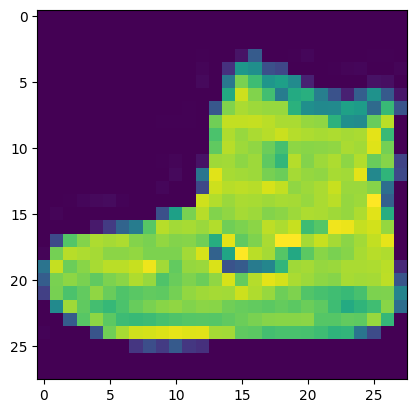

In [9]:
# plot single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

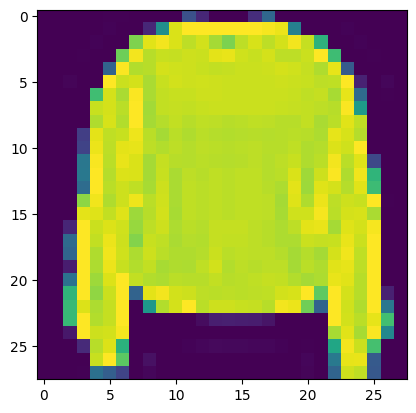

In [10]:
plt.imshow(train_data[7])

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Dress')

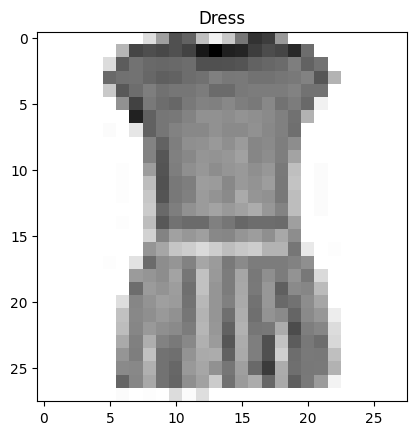

In [12]:
index = 3
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

In [13]:
# Building a classification model
# if model labels are one hot encoded - use CategoricalCrossentropy()
# if model labels are integers - use SparseCategoricalCrossentropy()
"""
a flatten layer is used to reshape the input data from a multi-dimensional array into a one-dimensional array (vector).
This is often necessary when transitioning from convolutional or recurrent layers to fully connected layers, as fully connected layers typically expect a one-dimensional input.

how the flatten layer works?

Input: The flatten layer takes the input data, which can be a multi-dimensional tensor, such as the output of a convolutional layer or a recurrent layer.
This input tensor can have dimensions like (batch_size, height, width, channels) for image data or (batch_size, sequence_length, input_features) for sequential data.

Reshaping: The flatten layer reshapes the input tensor into a one-dimensional vector by concatenating all the elements along all dimensions except the batch dimension.
For example, if the input tensor is (batch_size, height, width, channels), the flatten layer will reshape it into (batch_size, height * width * channels).
channels - RGB channel

Output: The output of the flatten layer is a one-dimensional vector of shape (batch_size, flattened_size), where flattened_size is the product of all the dimensions
in the input tensor except the batch dimension.
"""
tf.random.set_seed(42)

classification_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

classification_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

history_of_classification_model = classification_model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3036 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3025 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2379 - accuracy: 0.1319 - val_loss: 1.9717 - val_accuracy: 0.1992
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8671 - accuracy: 0.1962 - val_loss: 1.8242 - val_accuracy: 0.1997
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7834 - accuracy: 0.1967 - val_loss: 1.7537 - val_accuracy:

In [14]:
classification_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
train_data.min(), train_data.max()

(0, 255)

In [16]:
# scaling (or mormalizing) - data between 0 and 1 by dividing by maximum value
train_data_normalized = train_data / 255.0
test_data_normalized = test_data / 255.0

train_data_normalized.min(), train_data_normalized.max()

(0.0, 1.0)

In [17]:
# same model on normalized data
tf.random.set_seed(42)

norm_classification_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(10, activation = "softmax")
])

norm_classification_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

history_of_norm_classification_model = norm_classification_model.fit(train_data_normalized,
                                                                     train_labels,
                                                                     epochs=10,
                                                                     validation_data=(test_data_normalized, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1363 - accuracy: 0.5536 - val_loss: 0.8004 - val_accuracy: 0.7049
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7406 - accuracy: 0.7278 - val_loss: 0.7174 - val_accuracy: 0.7427
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6773 - accuracy: 0.7552 - val_loss: 0.6918 - val_accuracy: 0.7405
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6263 - accuracy: 0.7795 - val_loss: 0.6346 - val_accuracy: 0.7744
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5775 - accuracy: 0.8020 - val_loss: 0.6154 - val_accuracy: 0.7925
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5550 - accuracy: 0.8097 - val_loss: 0.5879 - val_accuracy: 0.7982
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5428 - accuracy: 0.8141 - val_loss: 0.5700 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

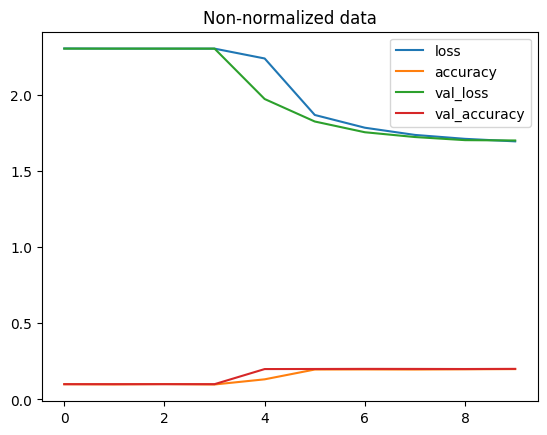

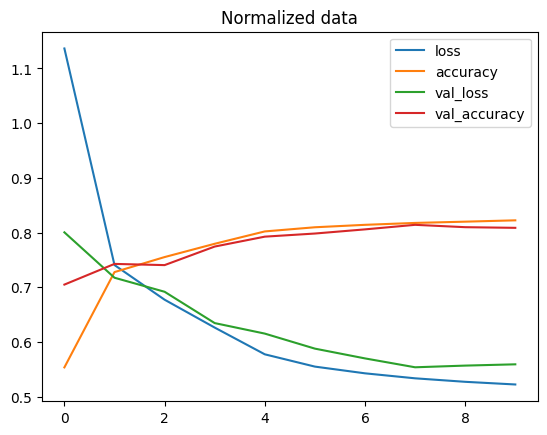

In [18]:
# plot history of both models
pd.DataFrame(history_of_classification_model.history).plot(title="Non-normalized data")
pd.DataFrame(history_of_norm_classification_model.history).plot(title="Normalized data")

In [19]:
# find ideal learning rate
tf.random.set_seed(42)

classification_model_2 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(10, activation = "softmax")
])

classification_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

# create a learning rate callback
"""
tf.keras.callbacks.LearningRateScheduler: This is a callback in TensorFlow and Keras that allows you to schedule and adjust the learning rate during training. The learning rate is a hyperparameter that controls the step size at which the model's weights are updated during
gradient descent optimization. By changing the learning rate during training, you can potentially improve the training process and model convergence.

lambda epoch: 1e-3 * 10 ** (epoch/20): This lambda function defines how the learning rate should change at each epoch. It's a mathematical formula that increases the learning rate exponentially with each epoch. Specifically, it calculates the learning rate as follows:

- epoch: The current epoch number during training.
- 1e-3: This is a constant base learning rate. It's the starting learning rate, and it's multiplied by the exponential term.
- 10 ** (epoch/20): This term increases the learning rate exponentially. As the number of epochs increases, this term grows. For example, when epoch is 0, the learning rate is 1e-3, and as epoch increases, the learning rate grows exponentially.
"""

learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

history_of_classification_model_2 = classification_model_2.fit(train_data_normalized,
                                                               train_labels,
                                                               epochs=40,
                                                               validation_data=(test_data_normalized, test_labels),
                                                               callbacks=[learning_rate_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1966 - accuracy: 0.5820 - val_loss: 0.7832 - val_accuracy: 0.7280 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6861 - accuracy: 0.7577 - val_loss: 0.6600 - val_accuracy: 0.7719 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6160 - accuracy: 0.7851 - val_loss: 0.6189 - val_accuracy: 0.7849 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5883 - accuracy: 0.7954 - val_loss: 0.6003 - val_accuracy: 0.7960 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5739 - accuracy: 0.7998 - val_loss: 0.6160 - val_accuracy: 0.7856 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5631 - accuracy: 0.8024 - val_loss: 0.6048 - val_accuracy: 0.7898 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Find ideal learning rate')

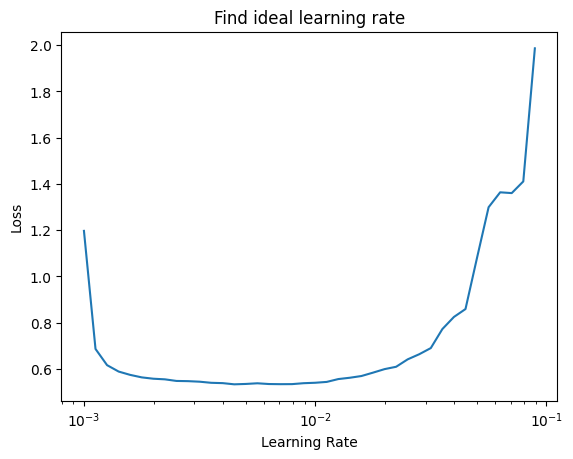

In [20]:
import matplotlib.pyplot as plt

learning_rates = 1e-3 * (10 ** (tf.range(40)/20)) # OR learning_rates = [1e-3 * 10 ** (epoch / 20) for epoch in range(40)]
plt.semilogx(learning_rates, history_of_classification_model_2.history["loss"])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Find ideal learning rate') # should be lowest point of the curve

In [21]:
# refit model with ideal learning rate 0.001
tf.random.set_seed(42)

classification_model_2 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(10, activation = "softmax")
])

classification_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # default is also 0.001
                        metrics=["accuracy"])


history_of_classification_model_2 = classification_model_2.fit(train_data_normalized,
                                                               train_labels,
                                                               epochs=20,
                                                               validation_data=(test_data_normalized, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4023 - accuracy: 0.4595 - val_loss: 1.1435 - val_accuracy: 0.5562
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0803 - accuracy: 0.5653 - val_loss: 1.0563 - val_accuracy: 0.5805
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9867 - accuracy: 0.6349 - val_loss: 0.8934 - val_accuracy: 0.6808
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8097 - accuracy: 0.7126 - val_loss: 0.7440 - val_accuracy: 0.7477
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6852 - accuracy: 0.7647 - val_loss: 0.6950 - val_accuracy: 0.7593
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6344 - accuracy: 0.7863 - val_loss: 0.6573 - val_accuracy: 0.7807
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6071 - accuracy: 0.7950 - val_loss: 0.6188 - val_accuracy:

In [22]:
# confusion matrix
# following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred)
    y_pred: Array of predicted labels (must be same shape as y_true)
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure
    text_size: Size of output figure text
  """
  # Create confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # number of classes

  # Plot figure
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [23]:
y_probablities = classification_model_2.predict(test_data_normalized)
y_probablities[:5]

313/313 [==============================] - 1s 1ms/step


array([[4.86732573e-12, 2.69762424e-11, 4.04428454e-16, 1.75662467e-06,
        6.24237302e-08, 5.22186756e-01, 2.20444704e-11, 1.02636613e-01,
        1.55753572e-03, 3.73617381e-01],
       [3.14405467e-03, 2.54951678e-02, 7.47830451e-01, 6.26700325e-03,
        1.65682510e-01, 4.74528497e-06, 5.15515096e-02, 5.70196501e-10,
        2.44876373e-05, 1.79998713e-12],
       [5.34354228e-07, 9.96901989e-01, 1.86094603e-05, 1.07797328e-03,
        1.78185129e-03, 1.13596529e-04, 2.79015103e-06, 1.02222788e-04,
        3.81533340e-07, 2.62803335e-09],
       [1.15120855e-08, 9.94731188e-01, 1.80541193e-07, 2.68205738e-04,
        2.06446915e-04, 2.91190954e-04, 4.70362949e-08, 4.50253952e-03,
        7.74529241e-08, 2.67692588e-08],
       [1.28928944e-01, 4.32103552e-05, 2.54807204e-01, 2.23010015e-02,
        3.35183963e-02, 3.28290162e-06, 5.59300959e-01, 1.96360584e-11,
        1.09701580e-03, 1.61026331e-10]], dtype=float32)

In [24]:
# predicted class number and label
# highest value for prediction probailty - use the argmax()
y_probablities[0].argmax(), class_names[y_probablities[0].argmax()]

(5, 'Sandal')

In [25]:
"""
y_preds = y_probabilities.argmax(axis=1):

y_probabilities is assumed to be a matrix or tensor where each row represents the predicted probabilities for a different data point, and each column corresponds to a different class.
y_probabilities.argmax(axis=1) calculates the index of the class with the highest predicted probability along the axis 1 (columns) for each data point. This effectively finds the predicted class for each data point in your predictions and stores them in the y_preds array.
After executing this code, y_preds will be an array containing the predicted class (index) for each data point in your predictions.
"""
y_preds = y_probablities.argmax(axis=1)

# first 10 prediction labels
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [27]:
# confusion matrix from sklearn
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[766,   1,  28,  86,   6,   1,  99,   0,  13,   0],
       [  0, 944,  17,  32,   5,   0,   1,   0,   1,   0],
       [ 18,   0, 673,  13, 216,   0,  77,   0,   3,   0],
       [ 27,  31,  18, 821,  47,   0,  48,   0,   8,   0],
       [  0,   5,  92,  27, 801,   0,  61,   0,  14,   0],
       [  0,   0,   0,   8,   2, 902,   0,  46,  11,  31],
       [189,   3, 125,  57, 205,   0, 389,   0,  32,   0],
       [  0,   0,   0,   0,   0,  64,   0, 904,   0,  32],
       [  0,   1,   2,  10,  17,  15,  35,   4, 915,   1],
       [  0,   0,   0,   0,   0,  46,   1,  46,   8, 899]])

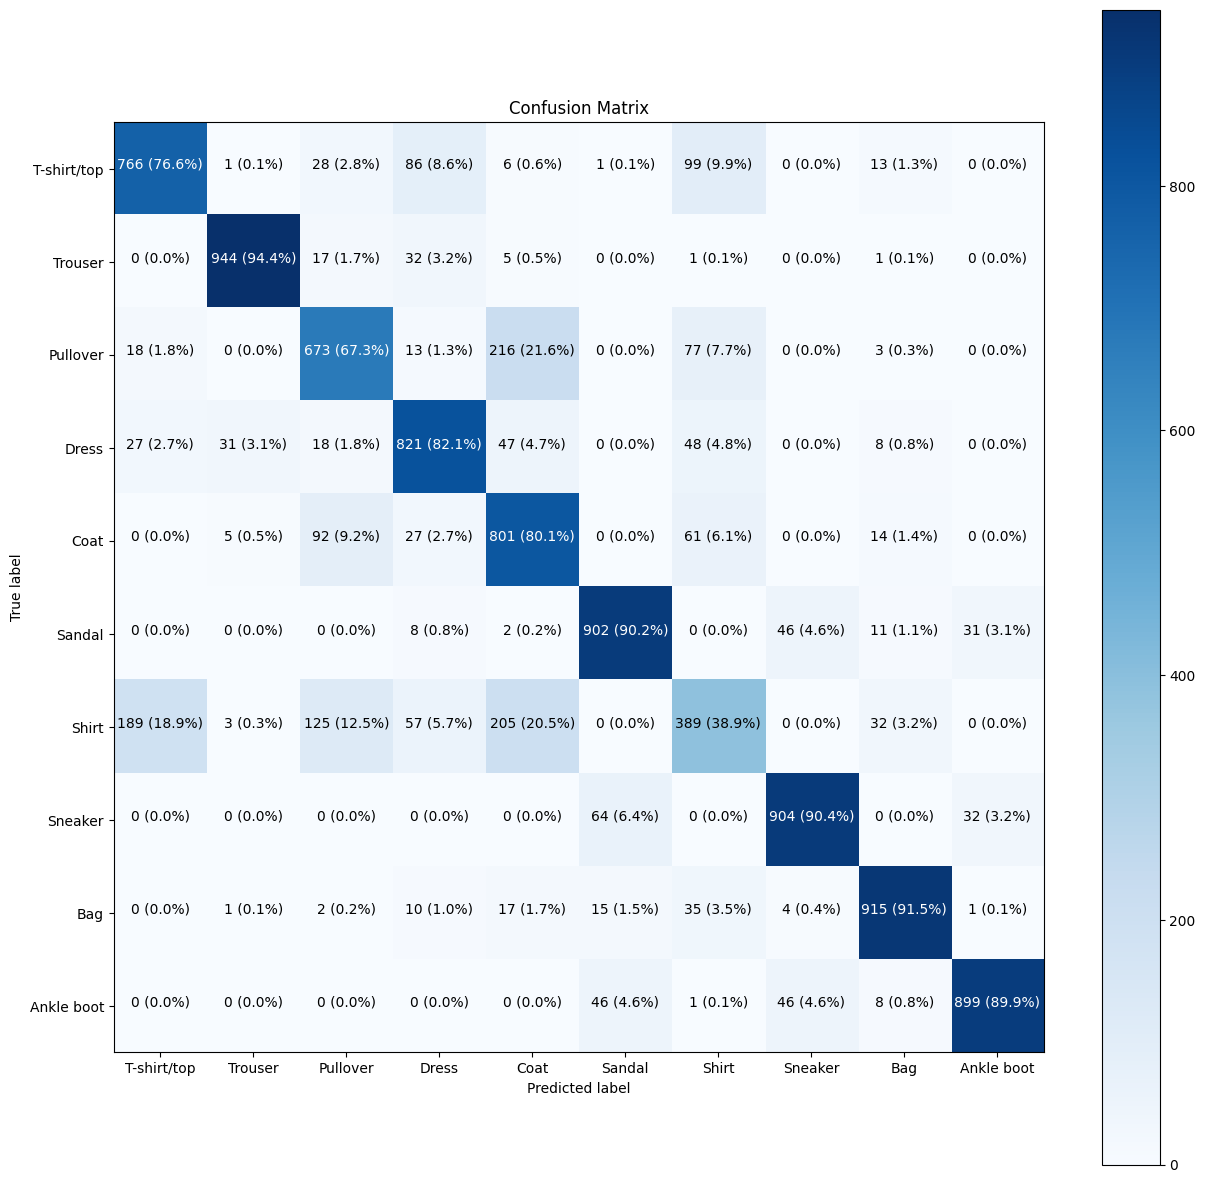

In [28]:
# confusion matrix from the function created
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [29]:
# get patterns from the neual network from a layer
weights, biases = classification_model_2.layers[1].get_weights()

weights, weights.shape

(array([[ 0.4738113 ,  0.5748264 , -0.04824037, -0.06036632],
        [-0.47703815, -0.07066843, -0.0828243 ,  0.54125476],
        [-0.6696912 ,  0.446048  ,  0.0499868 ,  0.09172853],
        ...,
        [-0.51110494, -0.05938312, -0.00777826, -0.02030898],
        [-0.11980091, -0.64202386, -0.03973436,  0.30974284],
        [-0.40209183, -0.0278323 , -0.05499435, -0.78532463]],
       dtype=float32),
 (784, 4))

In [30]:
biases, biases.shape

(array([1.8622299e+00, 2.3880486e+00, 5.8222160e-04, 2.7185287e+00],
       dtype=float32),
 (4,))